In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BTP/undersampled_preprocessed_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Unnamed: 0.1,Label
0,0,80,6,01/03/2018 08:27:23,115349379,16,14,443,706.0,432,...,116781.3636,73135.77396,337294.0,94684.0,9.997771e+06,17409.35678,10000000.0,9947747.0,NaN,Benign
1,1,3389,6,02/03/2018 05:07:53,4465103,13,8,1460,1731.0,741,...,0.0000,0.00000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,NaN,Benign
2,2,3389,6,28/02/2018 01:33:52,15515205,9,8,1148,1581.0,677,...,369809.0000,0.00000,369809.0,369809.0,1.186104e+07,0.00000,11861044.0,11861044.0,NaN,Benign
3,3,443,6,02/03/2018 10:24:12,518,3,0,77,0.0,46,...,0.0000,0.00000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,NaN,Benign
4,4,443,6,01/03/2018 11:27:54,115760,10,8,507,4760.0,194,...,0.0000,0.00000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0,NaN,Benign


In [ ]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
d = df.isna().sum()
for i in d.iteritems():
  if i[1]>0:
    print(i[0],i[1])

Flow Byts/s 188
Flow Pkts/s 188


In [ ]:
df["Flow Byts/s"] = df["Flow Byts/s"].fillna(round(df["Flow Byts/s"].mean(),2))
df["Flow Pkts/s"] = df["Flow Pkts/s"].fillna(round(df["Flow Pkts/s"].mean(),2))

In [ ]:
X = df.drop(['Timestamp','Label'], axis=1)
y = df['Label']

In [ ]:
X.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,6,115349379,16,14,443,706.0,432,0,27.687500,...,12,20,116781.3636,73135.77396,337294.0,94684.0,9.997771e+06,17409.35678,10000000.0,9947747.0
1,3389,6,4465103,13,8,1460,1731.0,741,0,112.307692,...,7,20,0.0000,0.00000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0
2,3389,6,15515205,9,8,1148,1581.0,677,0,127.555556,...,5,20,369809.0000,0.00000,369809.0,369809.0,1.186104e+07,0.00000,11861044.0,11861044.0
3,443,6,518,3,0,77,0.0,46,0,25.666667,...,1,20,0.0000,0.00000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0
4,443,6,115760,10,8,507,4760.0,194,0,50.700000,...,4,20,0.0000,0.00000,0.0,0.0,0.000000e+00,0.00000,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((69237, 78), (29673, 78))

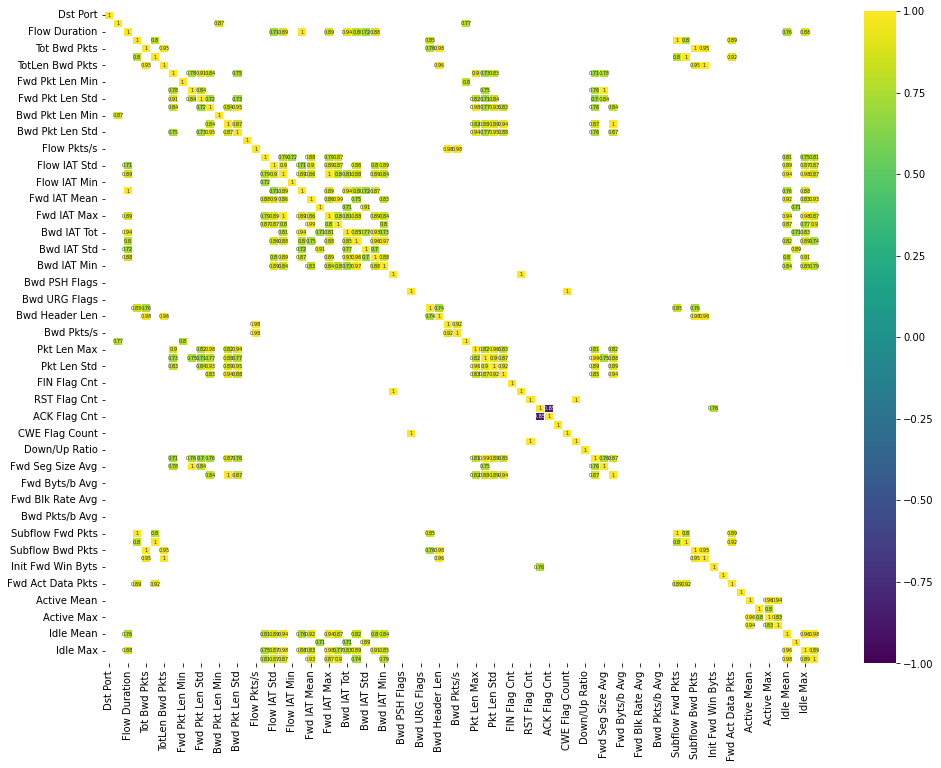

In [ ]:
plt.figure(figsize=(16,12))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix[(corr_matrix >= 0.7) | (corr_matrix <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 5})

In [ ]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(len(to_drop))

24


In [ ]:
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

In [ ]:
X_train.shape

(69237, 54)

In [ ]:
X_train.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Bwd Blk Rate Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Min,Idle Mean,Idle Std
18606,8080,6,11493,3,4,326,129.0,326,0,108.666667,...,0,8192,219,1,20,0.0,0.0,0.0,0.0,0.0
74434,21,6,1,1,1,0,0.0,0,0,0.000000,...,0,26883,0,0,40,0.0,0.0,0.0,0.0,0.0
70287,21,6,2,1,1,0,0.0,0,0,0.000000,...,0,26883,0,0,40,0.0,0.0,0.0,0.0,0.0
31783,80,6,5012119,2,0,0,0.0,0,0,0.000000,...,0,226,-1,0,32,0.0,0.0,0.0,5012119.0,0.0
73203,21,6,1,1,1,0,0.0,0,0,0.000000,...,0,26883,0,0,40,0.0,0.0,0.0,0.0,0.0


In [ ]:
np.isinf(X_train).values.sum()

0

In [ ]:
X_train.shape

(69237, 54)

In [ ]:
X_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
import pandas as pd    
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(ss.fit_transform(X_test),columns = X_test.columns)

In [ ]:
X_train.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Bwd Blk Rate Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Min,Idle Mean,Idle Std
0,0.534148,-0.26324,-0.381565,-0.067761,0.012968,-0.005822,-0.015534,0.846692,-0.205958,1.21354,...,0.0,-0.381742,-0.168222,-0.056099,-0.989706,-0.18053,-0.12876,-0.164141,-0.300327,-0.229547
1,-0.303639,-0.26324,-0.381928,-0.153405,-0.062254,-0.022017,-0.017902,-0.612015,-0.205958,-0.66047,...,0.0,1.037604,-0.189467,-0.105648,1.157852,-0.18053,-0.12876,-0.164141,-0.300327,-0.229547
2,-0.303639,-0.26324,-0.381928,-0.153405,-0.062254,-0.022017,-0.017902,-0.612015,-0.205958,-0.66047,...,0.0,1.037604,-0.189467,-0.105648,1.157852,-0.18053,-0.12876,-0.164141,-0.300327,-0.229547
3,-0.297505,-0.26324,-0.223636,-0.110583,-0.087328,-0.022017,-0.017902,-0.612015,-0.205958,-0.66047,...,0.0,-0.986659,-0.189564,-0.105648,0.298829,-0.18053,-0.12876,-0.164141,-0.039133,-0.229547
4,-0.303639,-0.26324,-0.381928,-0.153405,-0.062254,-0.022017,-0.017902,-0.612015,-0.205958,-0.66047,...,0.0,1.037604,-0.189467,-0.105648,1.157852,-0.18053,-0.12876,-0.164141,-0.300327,-0.229547


In [ ]:
X_test.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Bwd Blk Rate Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Min,Idle Mean,Idle Std
0,-0.299687,-0.256709,-0.385251,-0.098010,-0.096754,-0.469779,-0.020422,-0.611972,-0.232768,-0.662335,...,0.0,-0.987121,-0.192472,-0.419896,0.296159,-0.190625,-0.150587,-0.173418,-0.303401,-0.230797
1,-0.299687,-0.256709,-0.384350,-0.098010,-0.096754,-0.469779,-0.020422,-0.611972,-0.232768,-0.662335,...,0.0,-0.987121,-0.192472,-0.419896,0.296159,-0.190625,-0.150587,-0.173418,-0.303401,-0.230797
2,0.514340,-0.256709,-0.386342,-0.098010,-0.096754,-0.469779,-0.020422,-0.611972,-0.232768,-0.662335,...,0.0,-0.848543,-0.192472,-0.419896,-1.000759,-0.190625,-0.150587,-0.173418,-0.303401,-0.230797
3,-0.299687,-0.256709,-0.012134,-0.022885,0.015152,0.109904,-0.000945,1.406092,-0.232768,1.289813,...,0.0,1.034890,-0.171466,-0.214962,0.296159,-0.190419,-0.150587,-0.173170,0.051831,-0.230797
4,-0.305589,-0.256709,-0.386363,-0.135573,-0.068778,-0.469779,-0.020422,-0.611972,-0.232768,-0.662335,...,0.0,-0.985907,-0.170415,-0.419896,0.296159,-0.190625,-0.150587,-0.173418,-0.303401,-0.230797


In [ ]:
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from time import time

# Train LogisticRegression Model
# lgr = LogisticRegression(n_jobs=-1, random_state=0)
# lgr.fit(X_train, y_train);
            
# Train Decision Tree Model
print("Decsion Tree fitting")
dtc = DecisionTreeClassifier(criterion='entropy', random_state=0)
t0 = time()
dtc.fit(X_train, y_train)
print("Decision Tree training time:", round(time()-t0, 3), "s")

# Train SVM Model
print("SVM fitting")
svc = SVC(random_state=0)
t0 = time()
svc.fit(X_train, y_train)
print("SVM training time:", round(time()-t0, 3), "s")

# Train RandomForestClassifier Model
print("Random Forest fitting")
rfc = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
t0 = time()
rfc.fit(X_train, y_train);
print("Random Forest training time:", round(time()-t0, 3), "s")

Decsion Tree fitting
Decision Tree training time: 1.771 s
SVM fitting
SVM training time: 78.141 s
Random Forest fitting
Random Forest training time: 13.11 s


In [ ]:
y_train.value_counts()

Bot                         7693
FTP-BruteForce              7693
DoS attacks-GoldenEye       7693
DoS attacks-SlowHTTPTest    7693
Infilteration               7693
SSH-Bruteforce              7693
DoS attacks-Slowloris       7693
DoS attacks-Hulk            7693
Benign                      7693
Name: Label, dtype: int64

In [ ]:
y_test.value_counts()

DoS attacks-Hulk            3297
Bot                         3297
DoS attacks-GoldenEye       3297
SSH-Bruteforce              3297
DoS attacks-Slowloris       3297
DoS attacks-SlowHTTPTest    3297
FTP-BruteForce              3297
Benign                      3297
Infilteration               3297
Name: Label, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid')}

clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

models = []
models.append(('SVM Classifier', svc))
models.append(('Decision Tree Classifier', dtc))
models.append(('RandomForest Classifier', rfc))
# models.append(('LogisticRegression', lgr))

for i, v in models:
  print(f"\n============================== {i} Model Evaluation ==============================\n")
  # print(v.score(X_test,y_test))
  # print(classification_report(y_test, v.predict(X_test)))
  scores = cross_val_score(v, X_train, y_train, cv=10)
  accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
  confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
  classification = metrics.classification_report(y_test, v.predict(X_test))
  print ("Cross Validation Mean Score:" "\n", scores.mean(),"\n")
  print ("Model Accuracy:" "\n", accuracy,"\n")
  print("Confusion matrix:" "\n", confusion_matrix,"\n")
  print("Classification report:" "\n", classification,"\n")